<div style="display: flex; text-align:center; background-color: RGB(  255, 87, 34  );" >
<h1 style="margin: auto; padding: 30px; ">Créez et utilisez une base de données immobilière avec Python<br>
</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 1 - Importation et nettoyage des des données</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">Importer les bibliothèques</h3>
</div>

In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 as sql
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">Mes fonctions</h3>
</div>

In [270]:
# fonction pour verifier les valeurs manquantes par colonne
def check_NA(df):
    print(df.isna().sum())

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">Importer les données</h3>
</div>

In [262]:
local   = pd.read_csv("data/local.csv", sep=';')
bien    = pd.read_csv("data/bien.csv", sep=';')
commune = pd.read_csv("data/commune.csv", sep=';')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">Merger les fichiers</h3>
</div>

In [263]:
# merger les fichiers dans un seul tableau
df_bien_local = pd.merge(bien, local, how='left', on="local_id")
df_all = pd.merge(df_bien_local, commune, how='left', on='commune_id')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">Créer une base de données SQLite</h3>
</div>

In [264]:
# creer une base de données SQL pour stocker les données
con = sql.connect('my.db')

In [265]:
# sauvegarder le tableau dans SQlite
df_all.to_sql(name='df_immo', con=con, if_exists='replace')

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 2 - Analyse exploratoire des données</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">Extraire les données à partir de la base de données</h3>
</div>

In [266]:
# Lire la base de données SQLite
con = sql.connect("my.db")
#Lire le tableau
df2 = pd.read_sql_query("SELECT * from df_immo", con)
#fermer la connection
con.close()

In [267]:
# afficher l'entete de ma table
df2.head()

,index,bien_id,date_mutation,nature_mutation,valeur_fonciere,surface_carrez,nombre_pieces_principales,commune_id,local_id,type_local,code_departement,commune
0,0,1,2020-02-03 00:00:00,Vente,56000.0,50.42,2,0,2,Appartement,1,SAINT-ETIENNE-DU-BOIS
1,1,2,2020-01-02 00:00:00,Vente,165000.0,48.22,3,1,2,Appartement,1,CHEVRY
2,2,3,2020-01-08 00:00:00,Vente,720000.0,130.80,6,2,2,Appartement,1,DIVONNE-LES-BAINS
3,3,4,2020-01-06 00:00:00,Vente,429250.0,109.22,5,3,1,Maison,1,PERON
4,4,5,2020-01-07 00:00:00,Vente,220900.0,108.65,4,4,2,Appartement,1,VALSERHONE


In [268]:
# Convertir la colonne date en format date
df2['date_mutation'] = pd.to_datetime(df2['date_mutation'])

# mettre la colonne date comme index
#df2 = df2.set_index(['date_mutation'])

In [271]:
# verifier les valeurs manquantes par colonne
check_NA(df2)

index                         0
bien_id                       0
date_mutation                 0
nature_mutation               0
valeur_fonciere              18
surface_carrez                0
nombre_pieces_principales     0
commune_id                    0
local_id                      0
type_local                    0
code_departement              0
commune                       0
dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">La distribution des variables</h3>
</div>

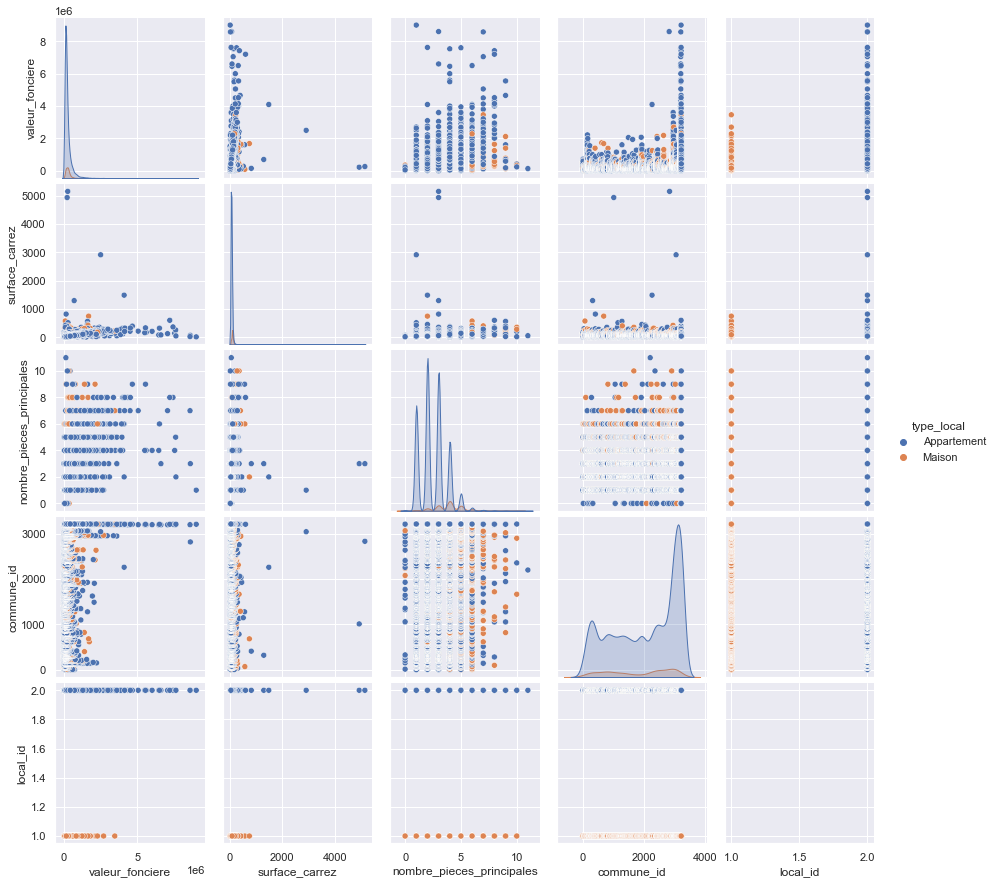

In [217]:
# afficher la distribution des variables sur mon jeu de données
sns.pairplot(df2.iloc[:,2:], hue='type_local')
# exporter la figure
plt.savefig('pairplot.png')

In [218]:
df2.head()

,index,bien_id,date_mutation,nature_mutation,valeur_fonciere,surface_carrez,nombre_pieces_principales,commune_id,local_id,type_local,code_departement,commune
0,0,1,2020-02-03,Vente,56000.0,50.42,2,0,2,Appartement,1,SAINT-ETIENNE-DU-BOIS
1,1,2,2020-01-02,Vente,165000.0,48.22,3,1,2,Appartement,1,CHEVRY
2,2,3,2020-01-08,Vente,720000.0,130.80,6,2,2,Appartement,1,DIVONNE-LES-BAINS
3,3,4,2020-01-06,Vente,429250.0,109.22,5,3,1,Maison,1,PERON
4,4,5,2020-01-07,Vente,220900.0,108.65,4,4,2,Appartement,1,VALSERHONE


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">Evolution des prix de vente dans le temps</h3>
</div>

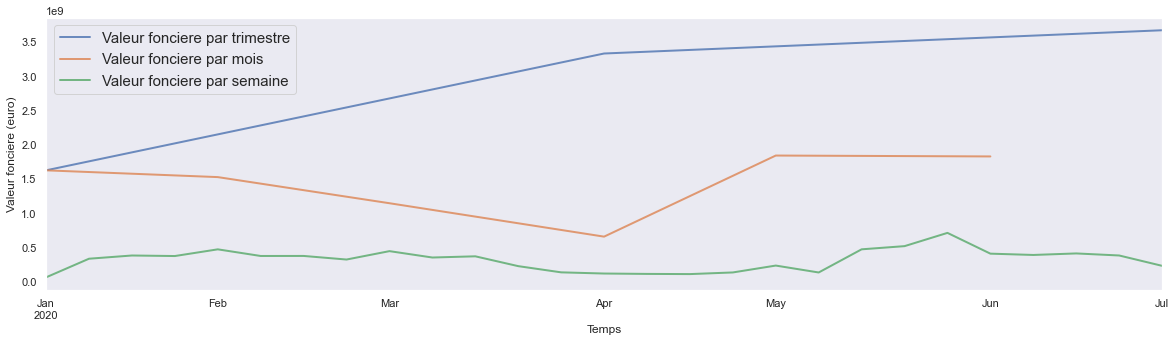

In [219]:
# Representation graphique de l'evolution des prix de ventes des biens
plt.figure(figsize=(20, 5))
df = df2.set_index(['date_mutation'])
df.loc["2020"]['valeur_fonciere'].resample('3M').sum().plot(label="Valeur fonciere par trimestre", lw=2, ls='-', alpha=0.8)
df.loc["2020"]['valeur_fonciere'].resample('M').sum().plot(label="Valeur fonciere par mois"      , lw=2, ls='-', alpha=0.8)
df.loc["2020"]['valeur_fonciere'].resample('w').sum().plot(label="Valeur fonciere par semaine"   , lw=2, ls='-', alpha=0.8)
plt.xlabel("Temps")
plt.ylabel("Valeur fonciere (euro)")
plt.legend(fontsize=15, loc = "upper left")
plt.grid(b=None)
plt.savefig('evol_valFonc_trimest_mois_annee.png', dpi = 199) # save plots
plt.show()

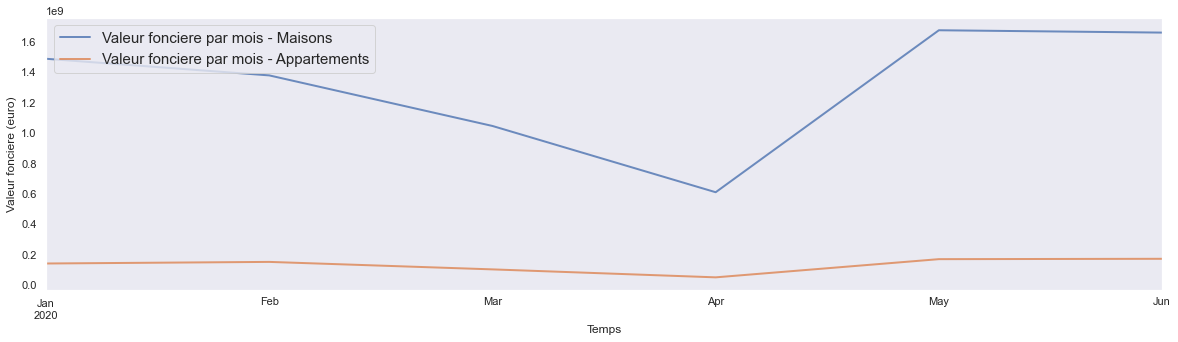

In [220]:
# Representation graphique de l'evolution des prix de ventes des maisons et appartements
dt_appart = df[(df["type_local"] == "Appartement")]
dt_maison = df[(df["type_local"] == "Maison")]

plt.figure(figsize=(20, 5))
dt_appart.loc["2020"]['valeur_fonciere'].resample('M').sum().plot(label="Valeur fonciere par mois - Maisons", lw=2, ls='-', alpha=0.8)
dt_maison.loc["2020"]['valeur_fonciere'].resample('M').sum().plot(label="Valeur fonciere par mois - Appartements", lw=2, ls='-', alpha=0.8)

plt.xlabel("Temps")

plt.ylabel("Valeur fonciere (euro)")
plt.legend(fontsize=15, loc = "upper left")
plt.grid(b=None)
plt.savefig('evol_valFonc_mois_maison_appart.png', dpi = 199) # save plots
plt.show()

In [221]:
# Nombre total d’appartements vendus au 1er semestre 2020.
nb_appart_s1_2020 = df2[(df2.date_mutation > '2020-01-01') & (df2.date_mutation < '2020-07-01') & (df2["type_local"] == "Appartement")]
print(nb_appart_s1_2020.shape[0])

31378


In [222]:
prop_ventes_app_nbPieces.head()

,nombre_pieces_principales,Total
0,0,30
1,1,6739
2,2,9783
3,3,8966
4,4,4460


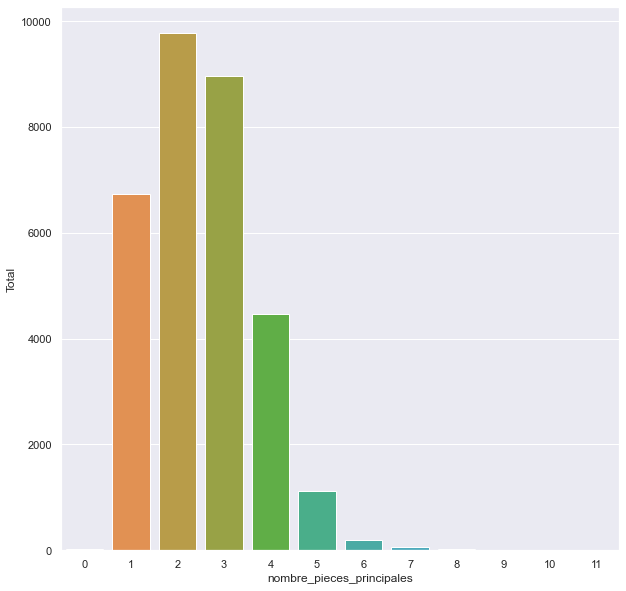

In [223]:
# Proportion des ventes d’appartements par le nombre de pièces.
prop_ventes_app_nbPieces = df2[(df2.type_local == "Appartement") & (df2.nature_mutation == "Vente")].groupby('nombre_pieces_principales').size().reset_index(name='Total')

# presentation graphique
plt.figure(figsize=(10, 10))
sns.barplot(x = 'nombre_pieces_principales', y = 'Total', data = prop_ventes_app_nbPieces)
plt.savefig('prop_ventes_app_par_nb_pieces.png', dpi = 199)
plt.show()

- La majorité des appartements vendus sont composés de 1 à 3 pièces

In [224]:
# Liste des 10 départements où le prix du mètre carré est le plus élevé.
## calculer le prix du m2
df2['prix_m2'] = df2["valeur_fonciere"]/df2["surface_carrez"]

# afficher les dep avec le prix du m2 le plus elevé
prix_dep = df2[["code_departement", "prix_m2"]].sort_values(by=['prix_m2'], ascending=False)

prix_dep.drop_duplicates(subset=['code_departement']).head(10)

,code_departement,prix_m2
32274,75,989010.989011
27528,94,262318.840580
10925,45,221297.709924
18197,78,187117.579909
21834,91,134375.000000
484,5,126850.000000
15948,74,91304.347826
1425,6,88073.394495
12760,59,79671.457906
23762,92,77269.800386


- Les departements d'ile de France sont ceux avec le prix du m2 le plus élevé

In [225]:
# Prix moyen du mètre carré d’une maison en Île-de-France.
df2[(df2.type_local == 'Maison') & (df2["code_departement"].isin(["75","77", "78", "91", "92", "93", "94", "95"]))][["prix_m2"]].mean()

prix_m2    3745.01365
dtype: float64

- Le prix moyen d'une maison en Ile de France est 3745 euro

In [226]:
# Liste des 10 appartements les plus chers avec le département et le nombre de mètres carrés.
df2[(df2.type_local == 'Appartement')][["bien_id", "code_departement", "valeur_fonciere"]].sort_values(by='valeur_fonciere', ascending=False).head(10)

,bien_id,code_departement,valeur_fonciere
32274,32275,75,9000000.0
21834,21835,91,8600000.0
29798,29799,75,8577713.0
32432,32433,75,7620000.0
29849,29850,75,7600000.0
29521,29522,75,7535000.0
31972,31973,75,7420000.0
32134,32135,75,7200000.0
29352,29353,75,7050000.0
29512,29513,75,6600000.0


- Les appartements de Paris sont les plus chers en France

In [227]:
# Taux d’évolution du nombre de ventes entre le premier et le second trimestre de 2020.
R1 = df2[(df2.date_mutation >= '2020-01-01') & (df2.date_mutation <= '2020-03-30') & (df2.nature_mutation == 'Vente')].shape[0]
R2 = df2[(df2.date_mutation >= '2020-04-01') & (df2.date_mutation <= '2020-06-30') & (df2.nature_mutation == 'Vente')].shape[0]
print(round((R2 - R1) / R1 * 100, 2), "%")

4.58 %


In [228]:
# Différence en pourcentage du prix au mètre carré entre un appartement de 2 pièces et un appartement de 3 pièces.
app_2p = df2[(df2.type_local == 'Appartement') & (df2.nombre_pieces_principales == 2)][['prix_m2']].mean()
app_3p = df2[(df2.type_local == 'Appartement') & (df2.nombre_pieces_principales == 3)][['prix_m2']].mean()

In [229]:
print(round(100 - (app_3p[0] * 100) /  app_2p[0],2), "%")

12.4 %


In [210]:
# Once a Connection has been established, create a Cursor object and call its execute() method to perform SQL commands:
#cur = con.cursor()

# Create table
#cur.execute('''CREATE TABLE stocks
               #(date text, trans text, symbol text, qty real, price real)''')

# Insert a row of data
#cur.execute("INSERT INTO stocks VALUES ('2006-01-05','BUY','RHAT',100,35.14)")

# Save (commit) the changes
#con.commit()

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
#con.close()

In [236]:
# les moyennes de valeurs foncières pour le top 20 des communes.
con = sql.connect("my.db")
df3 = pd.read_sql_query("SELECT commune, round(avg(valeur_fonciere),2) as Moyenne FROM df_immo WHERE commune_id NOTNULL GROUP BY commune ORDER BY Moyenne DESC LIMIT 20", con)
#fermer la connection
con.close()

In [237]:
df3

,commune,Moyenne
0,GARRIGUES SAINTE EULALIE,1683000.00
1,LES PORTES-EN-RE,1400000.00
2,VERNEUIL EN HALATTE,1280000.00
3,PARIS 07,1251288.40
4,PARIS 16,1028243.69
5,PARIS 01,1013503.91
6,PARIS 08,1010536.07
7,PARIS 06,1005955.57
8,SAINT-JEAN-CAP-FERRAT,968750.00
9,VAL-D ISERE,880000.00
